<center><h1>EE559 HW #0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [ ]:
df = pd.read_csv('/content/sample_data/Salaries.csv',index_col='playerID',header=0,skiprows=[1])

#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [54]:
ids = df.loc[(df['salary'] > 1000000) & df['teamID'].isin(['ATL','HOU'])].index.values
print(ids)

['hornebo01' 'murphda05' 'suttebr01' 'ryanno01' 'hornebo01' 'murphda05'
 'suttebr01' 'ryanno01' 'griffke01' 'murphda05' 'suttebr01' 'ryanno01'
 'murphda05' 'suttebr01' 'smithda02' 'murphda05' 'suttebr01' 'clancji01'
 'davisgl01' 'ramirra01' 'scottmi03' 'smithda02' 'esaskni01' 'murphda05'
 'smithlo01' 'suttebr01' 'whitter01' 'clancji01' 'darwida01' 'davisgl01'
 'deshaji01' 'scottmi03' 'smithda02' 'breamsi01' 'esaskni01' 'gantro01'
 'leibrch01' 'pendlte01' 'smithlo01' 'caminke01' 'deshaji01' 'ramirra01'
 'scottmi03' 'berenju01' 'bielemi01' 'breamsi01' 'esaskni01' 'gantro01'
 'glavito02' 'leibrch01' 'nixonot01' 'penaal01' 'pendlte01' 'smithlo01'
 'smoltjo01' 'treadje01' 'biggicr01' 'caminke01' 'finlest01' 'jonesdo01'
 'portuma01' 'blausje01' 'breamsi01' 'gantro01' 'glavito02' 'justida01'
 'maddugr01' 'nixonot01' 'pendlte01' 'sandede02' 'smithpe02' 'smoltjo01'
 'biggicr01' 'caminke01' 'drabedo01' 'finlest01' 'harnipe01' 'jonesdo01'
 'portuma01' 'swindgr01' 'averyst01' 'blausje01' 'gantro01

#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [55]:
print(df.loc[df['teamID'] == 'ATL'].loc[:,'salary'].describe())

count    8.850000e+02
mean     2.207749e+06
std      3.434320e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [ ]:
# Assign dataframe headers to variable keys
keys = list(df)

# Declare dictionary
salary_dict = {}

# Initialize the dictionary keys as empty arrays to prevent error from occuring while appending
[salary_dict.setdefault(keys[x], []) for x in range(len(keys))] 

# Iterate over each row of dataframe
for index, row in df.iterrows():

  # Iterate over each header in the keys list
  for column in keys:

    # For correspoding header from keys list in dictionary pick the corresponding 
    # value in each row and append to the list in dictionary
    salary_dict[column].append(row.loc[column])

# Display the dictionary
print(salary_dict)

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [57]:
# Create a data frame from dictory using from_dict
df_new = pd.DataFrame.from_dict(salary_dict,orient='index').transpose()
df_new.columns=['a','b','c','d']
print(df_new)

          a    b   c         d
0      1985  ATL  NL    550000
1      1985  ATL  NL    545000
2      1985  ATL  NL    633333
3      1985  ATL  NL    625000
4      1985  ATL  NL    800000
...     ...  ...  ..       ...
25569  2015  WAS  NL    512800
25570  2015  WAS  NL    507500
25571  2015  WAS  NL  21000000
25572  2015  WAS  NL  16500000
25573  2015  WAS  NL  14000000

[25574 rows x 4 columns]


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [58]:
m=3
n=3
arr = [[i * j for j in range(m)] for i in range(n)]
print('2-Dimensional Python Object',arr)
print('NP Array Object\n',np.array(arr))

2-Dimensional Python Object [[0, 0, 0], [0, 1, 2], [0, 2, 4]]
NP Array Object
 [[0 0 0]
 [0 1 2]
 [0 2 4]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [59]:
print('NP Array ndim',np.array(arr).ndim)
print('NP Array shape',np.array(arr).shape)
print('NP Array size',np.array(arr).size)
print('NP Array size',np.array(arr).dtype)
print('NP Array size',np.array(arr).itemsize)
print('NP Array size',np.array(arr).data)

NP Array ndim 2
NP Array shape (3, 3)
NP Array size 9
NP Array size int64
NP Array size 8
NP Array size <memory at 0x7f92081a7120>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [60]:
print(np.array(arr).flatten())
print(np.array(arr).reshape(3,3))

[0 0 0 0 1 2 0 2 4]
[[0 0 0]
 [0 1 2]
 [0 2 4]]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [61]:
arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
print(arr[1:])
print(arr[1:2, 1:3])
arr = np.array([1,2,3,4,5,6])
print(arr[1:])
print(arr[0:3])

[[3 4 6]
 [7 8 9]]
[[4 6]]
[2 3 4 5 6]
[1 2 3]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [62]:
np.square(arr)

array([ 1,  4,  9, 16, 25, 36])

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

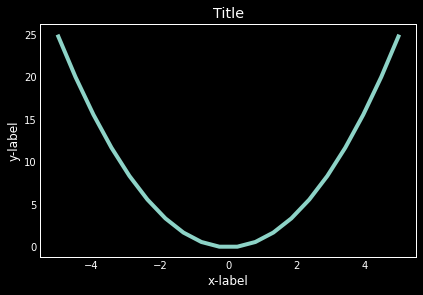

In [63]:
#@title Default title text
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
plt.title("Title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.plot(x, y)
plt.grid()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

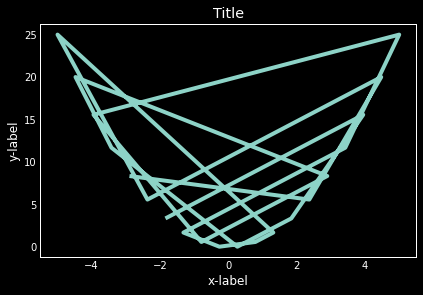

In [64]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
plt.title("Title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.plot(x, y)
plt.grid()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

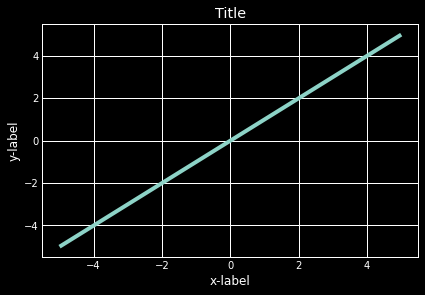

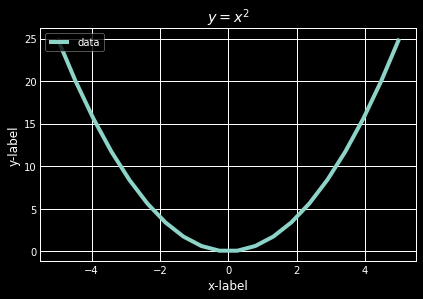

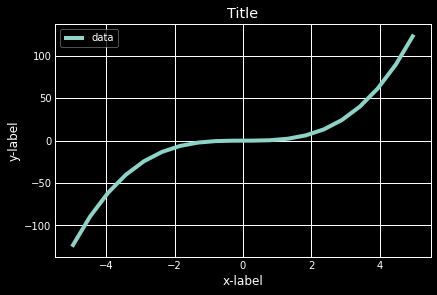

In [65]:
from matplotlib import style

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])

style.use('ggplot')
style.use('dark_background')
plt.title("Title")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.plot(x, y1)
plt.show()

y2 = np.array([j ** 2 for j in x])
style.use('dark_background')
plt.title(r'$y=x^2$')
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.plot(x, y2,label="data")
plt.legend(loc="upper left")
plt.show()

y3 = np.array([j ** 3 for j in x])
style.use('dark_background')
plt.title(r'Title')
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.plot(x, y3,label="data")
plt.legend(loc="upper left")
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

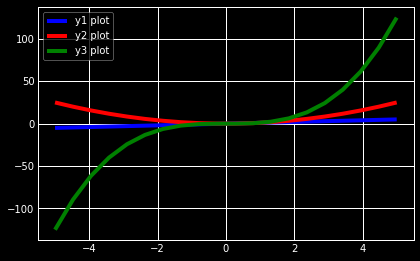

In [66]:
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
plt.plot(x, y1, 'b-', label='y1 plot')
plt.plot(x, y2, 'r-', label='y2 plot')
plt.plot(x, y3, 'g-', label='y3 plot')
plt.legend(loc='best')
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

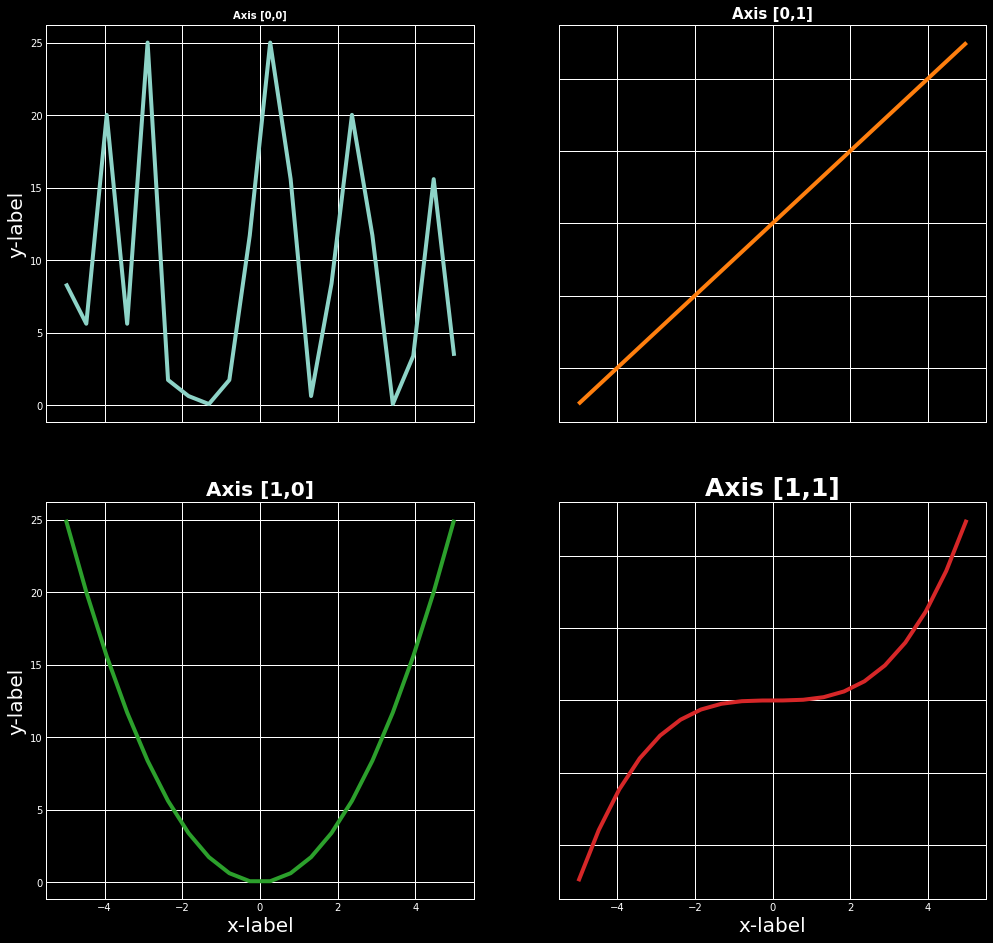

In [67]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]', fontname="Arial", fontweight="bold", size=10)
axs[0, 0].set_xlabel('X Label', fontsize = 20) 
axs[0, 0].set_ylabel('Y Label', fontsize = 20)
axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]', fontname="DejaVu Sans",fontweight="bold", size=15)
axs[0, 1].set_xlabel('X Label', fontsize = 20) 
axs[0, 1].set_ylabel('Y Label', fontsize = 20)
axs[1, 0].plot(x, y2, 'tab:green')
axs[1, 0].set_title('Axis [1,0]', fontname="Arial", fontweight="bold", size=20)
axs[1, 0].set_xlabel('X Label', fontsize = 20) 
axs[1, 0].set_ylabel('Y Label', fontsize = 20)
axs[1, 1].plot(x, y3, 'tab:red')
axs[1, 1].set_title('Axis [1,1]', fontname="Arial", fontweight="bold", size=25)
axs[1, 1].set_xlabel('X Label', fontsize = 20) 
axs[1, 1].set_ylabel('Y Label', fontsize = 20)
ax.set_ylabel('Active Wee1', fontsize = 20.0) # Y label
ax.set_xlabel('Active Cdc2-cyclin B', fontsize = 20) # X label

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

Text(0.5, 1.0, 'loglog base 2 on x')

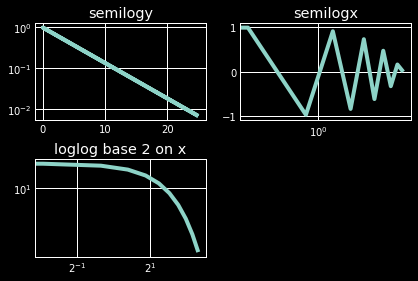

In [68]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.subplots_adjust(hspace=0.4)

# log y axis
plt.subplot(221)
plt.semilogy(y, np.exp(-y/5.0))
plt.title('semilogy')
plt.grid(True)

# log x axis
plt.subplot(222)
plt.semilogx(x, np.sin(2*np.pi*x))
plt.title('semilogx')
plt.grid(True)

# log x and y axis
plt.subplot(223)
plt.loglog(x, 20*np.exp(-y/10.0), basex=2)
plt.grid(True)
plt.title('loglog base 2 on x')


### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

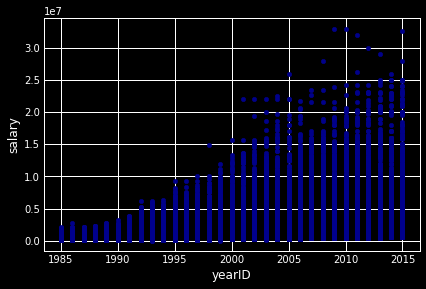

In [69]:
ax1 = df.plot.scatter(x='yearID',
                      y='salary',
                      c='DarkBlue')

(b) For year 1985, plot a bar chart to show the average salary for each team.

<Figure size 1440x360 with 0 Axes>

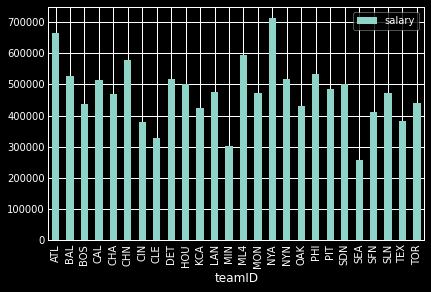

In [70]:
plt.figure(figsize=(20,5))
df.loc[df['yearID'] == 1985].groupby(['teamID']).mean().plot.bar(y='salary')


(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

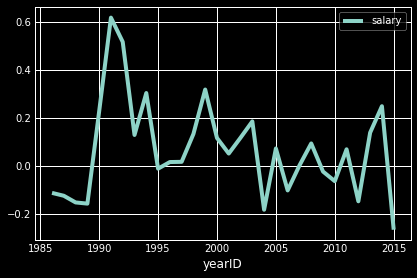

In [71]:
df.loc[df['teamID'] == 'ATL'].groupby(['yearID']).mean().pct_change().plot.line()

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


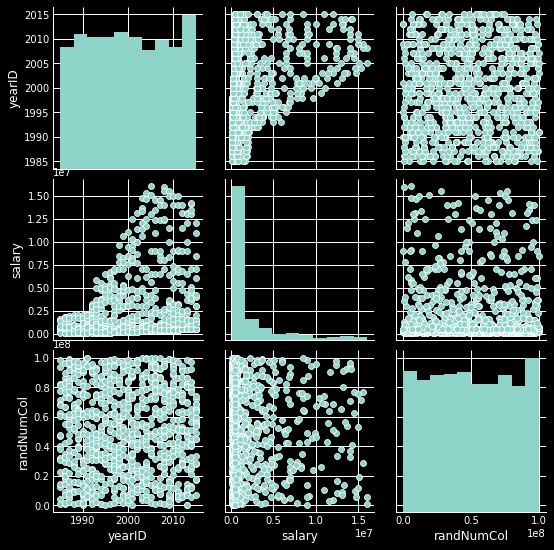

In [72]:
df['randNumCol'] = np.random.randint(1, 99999999, df.shape[0])

# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df.loc[df['teamID'] == 'ATL'])

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

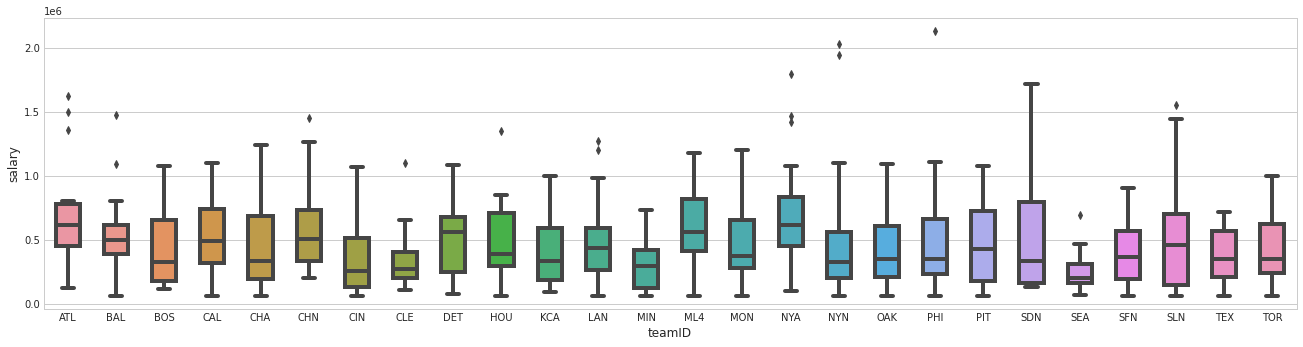

In [73]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,5)) 
sns.boxplot(x = 'teamID', y = 'salary', width=0.5, data = df.loc[df['yearID'] == 1985]) 

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.